In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
from scipy.optimize import linear_sum_assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings
from datetime import datetime

In [2]:
def custom_eff_assignment(cost_matrix, capacities):
    full_cost_matrix = np.repeat(cost_matrix, capacities, axis=1)
    row_ind, col_ind = linear_sum_assignment(full_cost_matrix)
    
    return full_cost_matrix[row_ind, col_ind].sum()

In [3]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 500
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

ALPHAS = [0.5, 0.3, 0.1, 0.08, 0.05]
BETAS = [0.5, 0.3, 0.1, 0.08, 0.05]

In [4]:
pof_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        print(a, b, datetime.now())
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
                round_=False
            )


            # Leximin
            lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
                sorted_increase_matrix, CAPACITIES
            )
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                lex_assignments = lex_assigner.solve()
            if lex_assignments is False:
                continue
            lex_cost = lex_assigner.get_cost(
                lex_assignments, cost_matrix=sorted_matrix
            )
            lex_cost_increases = lex_assigner.get_cost_increases(
                lex_assignments, increase_matrix=sorted_increase_matrix
            )
            
            
            # Efficient
            eff_assigner = assignment.AssignmentHelperV2(
                sorted_matrix, CAPACITIES
            )
            eff_assignments = eff_assigner.ip_solve()
            eff_cost = eff_assigner.get_cost(
                eff_assignments, cost_matrix=sorted_matrix
            )
            eff_cost_increases = eff_assigner.get_cost_increases(
                eff_assignments, increase_matrix=sorted_increase_matrix
            )


            if lex_cost_increases.max() > eff_cost_increases.max():
                print(sorted_matrix)
                print(lex_cost_increases.max(), eff_cost_increases.max())
                raise KeyboardInterrupt
            
            if eff_cost == 0:
                pof_pop[a_id][b_id].append(1)
            elif lex_cost / eff_cost > N - 1:
                print(sorted_matrix)
                print(lex_cost, eff_cost)
                raise KeyboardInterrupt
            else:
                pof_pop[a_id][b_id].append(lex_cost / eff_cost)
            success_count += 1
            
            print(a, b, success_count)
        
        print(np.mean(pof_pop[a_id][b_id]))

0.5 0.5 2020-04-24 11:39:36.270690
0.5 0.5 1
0.5 0.5 2
0.5 0.5 3
0.5 0.5 4
0.5 0.5 5
0.5 0.5 6
0.5 0.5 7
0.5 0.5 8
0.5 0.5 9
0.5 0.5 10
0.5 0.5 11
0.5 0.5 12
0.5 0.5 13
0.5 0.5 14
0.5 0.5 15
0.5 0.5 16
0.5 0.5 17
0.5 0.5 18
0.5 0.5 19
0.5 0.5 20
0.5 0.5 21
0.5 0.5 22
0.5 0.5 23
0.5 0.5 24
0.5 0.5 25
0.5 0.5 26
0.5 0.5 27
0.5 0.5 28
0.5 0.5 29
0.5 0.5 30
0.5 0.5 31
0.5 0.5 32
0.5 0.5 33
0.5 0.5 34
0.5 0.5 35
0.5 0.5 36
0.5 0.5 37
0.5 0.5 38
0.5 0.5 39
0.5 0.5 40
0.5 0.5 41
0.5 0.5 42
0.5 0.5 43
0.5 0.5 44
0.5 0.5 45
0.5 0.5 46
0.5 0.5 47
0.5 0.5 48
0.5 0.5 49
0.5 0.5 50
0.5 0.5 51
0.5 0.5 52
0.5 0.5 53
0.5 0.5 54
0.5 0.5 55
0.5 0.5 56
0.5 0.5 57
0.5 0.5 58
0.5 0.5 59
0.5 0.5 60
0.5 0.5 61
0.5 0.5 62
0.5 0.5 63
0.5 0.5 64
0.5 0.5 65
0.5 0.5 66
0.5 0.5 67
0.5 0.5 68
0.5 0.5 69
0.5 0.5 70
0.5 0.5 71
0.5 0.5 72
0.5 0.5 73
0.5 0.5 74
0.5 0.5 75
0.5 0.5 76
0.5 0.5 77
0.5 0.5 78
0.5 0.5 79
0.5 0.5 80
0.5 0.5 81
0.5 0.5 82
0.5 0.5 83
0.5 0.5 84
0.5 0.5 85
0.5 0.5 86
0.5 0.5 87
0.5 0.5 88
0.5 0.

0.5 0.3 195
0.5 0.3 196
0.5 0.3 197
0.5 0.3 198
0.5 0.3 199
0.5 0.3 200
0.5 0.3 201
0.5 0.3 202
0.5 0.3 203
0.5 0.3 204
0.5 0.3 205
0.5 0.3 206
0.5 0.3 207
0.5 0.3 208
0.5 0.3 209
0.5 0.3 210
0.5 0.3 211
0.5 0.3 212
0.5 0.3 213
0.5 0.3 214
0.5 0.3 215
0.5 0.3 216
0.5 0.3 217
0.5 0.3 218
0.5 0.3 219
0.5 0.3 220
0.5 0.3 221
0.5 0.3 222
0.5 0.3 223
0.5 0.3 224
0.5 0.3 225
0.5 0.3 226
0.5 0.3 227
0.5 0.3 228
0.5 0.3 229
0.5 0.3 230
0.5 0.3 231
0.5 0.3 232
0.5 0.3 233
0.5 0.3 234
0.5 0.3 235
0.5 0.3 236
0.5 0.3 237
0.5 0.3 238
0.5 0.3 239
0.5 0.3 240
0.5 0.3 241
0.5 0.3 242
0.5 0.3 243
0.5 0.3 244
0.5 0.3 245
0.5 0.3 246
0.5 0.3 247
0.5 0.3 248
0.5 0.3 249
0.5 0.3 250
0.5 0.3 251
0.5 0.3 252
0.5 0.3 253
0.5 0.3 254
0.5 0.3 255
0.5 0.3 256
0.5 0.3 257
0.5 0.3 258
0.5 0.3 259
0.5 0.3 260
0.5 0.3 261
0.5 0.3 262
0.5 0.3 263
0.5 0.3 264
0.5 0.3 265
0.5 0.3 266
0.5 0.3 267
0.5 0.3 268
0.5 0.3 269
0.5 0.3 270
0.5 0.3 271
0.5 0.3 272
0.5 0.3 273
0.5 0.3 274
0.5 0.3 275
0.5 0.3 276
0.5 0.3 277
0.5 

0.5 0.1 383
0.5 0.1 384
0.5 0.1 385
0.5 0.1 386
0.5 0.1 387
0.5 0.1 388
0.5 0.1 389
0.5 0.1 390
0.5 0.1 391
0.5 0.1 392
0.5 0.1 393
0.5 0.1 394
0.5 0.1 395
0.5 0.1 396
0.5 0.1 397
0.5 0.1 398
0.5 0.1 399
0.5 0.1 400
0.5 0.1 401
0.5 0.1 402
0.5 0.1 403
0.5 0.1 404
0.5 0.1 405
0.5 0.1 406
0.5 0.1 407
0.5 0.1 408
0.5 0.1 409
0.5 0.1 410
0.5 0.1 411
0.5 0.1 412
0.5 0.1 413
0.5 0.1 414
0.5 0.1 415
0.5 0.1 416
0.5 0.1 417
0.5 0.1 418
0.5 0.1 419
0.5 0.1 420
0.5 0.1 421
0.5 0.1 422
0.5 0.1 423
0.5 0.1 424
0.5 0.1 425
0.5 0.1 426
0.5 0.1 427
0.5 0.1 428
0.5 0.1 429
0.5 0.1 430
0.5 0.1 431
0.5 0.1 432
0.5 0.1 433
0.5 0.1 434
0.5 0.1 435
0.5 0.1 436
0.5 0.1 437
0.5 0.1 438
0.5 0.1 439
0.5 0.1 440
0.5 0.1 441
0.5 0.1 442
0.5 0.1 443
0.5 0.1 444
0.5 0.1 445
0.5 0.1 446
0.5 0.1 447
0.5 0.1 448
0.5 0.1 449
0.5 0.1 450
0.5 0.1 451
0.5 0.1 452
0.5 0.1 453
0.5 0.1 454
0.5 0.1 455
0.5 0.1 456
0.5 0.1 457
0.5 0.1 458
0.5 0.1 459
0.5 0.1 460
0.5 0.1 461
0.5 0.1 462
0.5 0.1 463
0.5 0.1 464
0.5 0.1 465
0.5 

0.5 0.05 25
0.5 0.05 26
0.5 0.05 27
0.5 0.05 28
0.5 0.05 29
0.5 0.05 30
0.5 0.05 31
0.5 0.05 32
0.5 0.05 33
0.5 0.05 34
0.5 0.05 35
0.5 0.05 36
0.5 0.05 37
0.5 0.05 38
0.5 0.05 39
0.5 0.05 40
0.5 0.05 41
0.5 0.05 42
0.5 0.05 43
0.5 0.05 44
0.5 0.05 45
0.5 0.05 46
0.5 0.05 47
0.5 0.05 48
0.5 0.05 49
0.5 0.05 50
0.5 0.05 51
0.5 0.05 52
0.5 0.05 53
0.5 0.05 54
0.5 0.05 55
0.5 0.05 56
0.5 0.05 57
0.5 0.05 58
0.5 0.05 59
0.5 0.05 60
0.5 0.05 61
0.5 0.05 62
0.5 0.05 63
0.5 0.05 64
0.5 0.05 65
0.5 0.05 66
0.5 0.05 67
0.5 0.05 68
0.5 0.05 69
0.5 0.05 70
0.5 0.05 71
0.5 0.05 72
0.5 0.05 73
0.5 0.05 74
0.5 0.05 75
0.5 0.05 76
0.5 0.05 77
0.5 0.05 78
0.5 0.05 79
0.5 0.05 80
0.5 0.05 81
0.5 0.05 82
0.5 0.05 83
0.5 0.05 84
0.5 0.05 85
0.5 0.05 86
0.5 0.05 87
0.5 0.05 88
0.5 0.05 89
0.5 0.05 90
0.5 0.05 91
0.5 0.05 92
0.5 0.05 93
0.5 0.05 94
0.5 0.05 95
0.5 0.05 96
0.5 0.05 97
0.5 0.05 98
0.5 0.05 99
0.5 0.05 100
0.5 0.05 101
0.5 0.05 102
0.5 0.05 103
0.5 0.05 104
0.5 0.05 105
0.5 0.05 106
0.5 0.05 

0.3 0.5 179
0.3 0.5 180
0.3 0.5 181
0.3 0.5 182
0.3 0.5 183
0.3 0.5 184
0.3 0.5 185
0.3 0.5 186
0.3 0.5 187
0.3 0.5 188
0.3 0.5 189
0.3 0.5 190
0.3 0.5 191
0.3 0.5 192
0.3 0.5 193
0.3 0.5 194
0.3 0.5 195
0.3 0.5 196
0.3 0.5 197
0.3 0.5 198
0.3 0.5 199
0.3 0.5 200
0.3 0.5 201
0.3 0.5 202
0.3 0.5 203
0.3 0.5 204
0.3 0.5 205
0.3 0.5 206
0.3 0.5 207
0.3 0.5 208
0.3 0.5 209
0.3 0.5 210
0.3 0.5 211
0.3 0.5 212
0.3 0.5 213
0.3 0.5 214
0.3 0.5 215
0.3 0.5 216
0.3 0.5 217
0.3 0.5 218
0.3 0.5 219
0.3 0.5 220
0.3 0.5 221
0.3 0.5 222
0.3 0.5 223
0.3 0.5 224
0.3 0.5 225
0.3 0.5 226
0.3 0.5 227
0.3 0.5 228
0.3 0.5 229
0.3 0.5 230
0.3 0.5 231
0.3 0.5 232
0.3 0.5 233
0.3 0.5 234
0.3 0.5 235
0.3 0.5 236
0.3 0.5 237
0.3 0.5 238
0.3 0.5 239
0.3 0.5 240
0.3 0.5 241
0.3 0.5 242
0.3 0.5 243
0.3 0.5 244
0.3 0.5 245
0.3 0.5 246
0.3 0.5 247
0.3 0.5 248
0.3 0.5 249
0.3 0.5 250
0.3 0.5 251
0.3 0.5 252
0.3 0.5 253
0.3 0.5 254
0.3 0.5 255
0.3 0.5 256
0.3 0.5 257
0.3 0.5 258
0.3 0.5 259
0.3 0.5 260
0.3 0.5 261
0.3 

0.3 0.3 367
0.3 0.3 368
0.3 0.3 369
0.3 0.3 370
0.3 0.3 371
0.3 0.3 372
0.3 0.3 373
0.3 0.3 374
0.3 0.3 375
0.3 0.3 376
0.3 0.3 377
0.3 0.3 378
0.3 0.3 379
0.3 0.3 380
0.3 0.3 381
0.3 0.3 382
0.3 0.3 383
0.3 0.3 384
0.3 0.3 385
0.3 0.3 386
0.3 0.3 387
0.3 0.3 388
0.3 0.3 389
0.3 0.3 390
0.3 0.3 391
0.3 0.3 392
0.3 0.3 393
0.3 0.3 394
0.3 0.3 395
0.3 0.3 396
0.3 0.3 397
0.3 0.3 398
0.3 0.3 399
0.3 0.3 400
0.3 0.3 401
0.3 0.3 402
0.3 0.3 403
0.3 0.3 404
0.3 0.3 405
0.3 0.3 406
0.3 0.3 407
0.3 0.3 408
0.3 0.3 409
0.3 0.3 410
0.3 0.3 411
0.3 0.3 412
0.3 0.3 413
0.3 0.3 414
0.3 0.3 415
0.3 0.3 416
0.3 0.3 417
0.3 0.3 418
0.3 0.3 419
0.3 0.3 420
0.3 0.3 421
0.3 0.3 422
0.3 0.3 423
0.3 0.3 424
0.3 0.3 425
0.3 0.3 426
0.3 0.3 427
0.3 0.3 428
0.3 0.3 429
0.3 0.3 430
0.3 0.3 431
0.3 0.3 432
0.3 0.3 433
0.3 0.3 434
0.3 0.3 435
0.3 0.3 436
0.3 0.3 437
0.3 0.3 438
0.3 0.3 439
0.3 0.3 440
0.3 0.3 441
0.3 0.3 442
0.3 0.3 443
0.3 0.3 444
0.3 0.3 445
0.3 0.3 446
0.3 0.3 447
0.3 0.3 448
0.3 0.3 449
0.3 

0.3 0.08 51
0.3 0.08 52
0.3 0.08 53
0.3 0.08 54
0.3 0.08 55
0.3 0.08 56
0.3 0.08 57
0.3 0.08 58
0.3 0.08 59
0.3 0.08 60
0.3 0.08 61
0.3 0.08 62
0.3 0.08 63
0.3 0.08 64
0.3 0.08 65
0.3 0.08 66
0.3 0.08 67
0.3 0.08 68
0.3 0.08 69
0.3 0.08 70
0.3 0.08 71
0.3 0.08 72
0.3 0.08 73
0.3 0.08 74
0.3 0.08 75
0.3 0.08 76
0.3 0.08 77
0.3 0.08 78
0.3 0.08 79
0.3 0.08 80
0.3 0.08 81
0.3 0.08 82
0.3 0.08 83
0.3 0.08 84
0.3 0.08 85
0.3 0.08 86
0.3 0.08 87
0.3 0.08 88
0.3 0.08 89
0.3 0.08 90
0.3 0.08 91
0.3 0.08 92
0.3 0.08 93
0.3 0.08 94
0.3 0.08 95
0.3 0.08 96
0.3 0.08 97
0.3 0.08 98
0.3 0.08 99
0.3 0.08 100
0.3 0.08 101
0.3 0.08 102
0.3 0.08 103
0.3 0.08 104
0.3 0.08 105
0.3 0.08 106
0.3 0.08 107
0.3 0.08 108
0.3 0.08 109
0.3 0.08 110
0.3 0.08 111
0.3 0.08 112
0.3 0.08 113
0.3 0.08 114
0.3 0.08 115
0.3 0.08 116
0.3 0.08 117
0.3 0.08 118
0.3 0.08 119
0.3 0.08 120
0.3 0.08 121
0.3 0.08 122
0.3 0.08 123
0.3 0.08 124
0.3 0.08 125
0.3 0.08 126
0.3 0.08 127
0.3 0.08 128
0.3 0.08 129
0.3 0.08 130
0.3 0.08 

0.3 0.05 190
0.3 0.05 191
0.3 0.05 192
0.3 0.05 193
0.3 0.05 194
0.3 0.05 195
0.3 0.05 196
0.3 0.05 197
0.3 0.05 198
0.3 0.05 199
0.3 0.05 200
0.3 0.05 201
0.3 0.05 202
0.3 0.05 203
0.3 0.05 204
0.3 0.05 205
0.3 0.05 206
0.3 0.05 207
0.3 0.05 208
0.3 0.05 209
0.3 0.05 210
0.3 0.05 211
0.3 0.05 212
0.3 0.05 213
0.3 0.05 214
0.3 0.05 215
0.3 0.05 216
0.3 0.05 217
0.3 0.05 218
0.3 0.05 219
0.3 0.05 220
0.3 0.05 221
0.3 0.05 222
0.3 0.05 223
0.3 0.05 224
0.3 0.05 225
0.3 0.05 226
0.3 0.05 227
0.3 0.05 228
0.3 0.05 229
0.3 0.05 230
0.3 0.05 231
0.3 0.05 232
0.3 0.05 233
0.3 0.05 234
0.3 0.05 235
0.3 0.05 236
0.3 0.05 237
0.3 0.05 238
0.3 0.05 239
0.3 0.05 240
0.3 0.05 241
0.3 0.05 242
0.3 0.05 243
0.3 0.05 244
0.3 0.05 245
0.3 0.05 246
0.3 0.05 247
0.3 0.05 248
0.3 0.05 249
0.3 0.05 250
0.3 0.05 251
0.3 0.05 252
0.3 0.05 253
0.3 0.05 254
0.3 0.05 255
0.3 0.05 256
0.3 0.05 257
0.3 0.05 258
0.3 0.05 259
0.3 0.05 260
0.3 0.05 261
0.3 0.05 262
0.3 0.05 263
0.3 0.05 264
0.3 0.05 265
0.3 0.05 266

0.1 0.5 352
0.1 0.5 353
0.1 0.5 354
0.1 0.5 355
0.1 0.5 356
0.1 0.5 357
0.1 0.5 358
0.1 0.5 359
0.1 0.5 360
0.1 0.5 361
0.1 0.5 362
0.1 0.5 363
0.1 0.5 364
0.1 0.5 365
0.1 0.5 366
0.1 0.5 367
0.1 0.5 368
0.1 0.5 369
0.1 0.5 370
0.1 0.5 371
0.1 0.5 372
0.1 0.5 373
0.1 0.5 374
0.1 0.5 375
0.1 0.5 376
0.1 0.5 377
0.1 0.5 378
0.1 0.5 379
0.1 0.5 380
0.1 0.5 381
0.1 0.5 382
0.1 0.5 383
0.1 0.5 384
0.1 0.5 385
0.1 0.5 386
0.1 0.5 387
0.1 0.5 388
0.1 0.5 389
0.1 0.5 390
0.1 0.5 391
0.1 0.5 392
0.1 0.5 393
0.1 0.5 394
0.1 0.5 395
0.1 0.5 396
0.1 0.5 397
0.1 0.5 398
0.1 0.5 399
0.1 0.5 400
0.1 0.5 401
0.1 0.5 402
0.1 0.5 403
0.1 0.5 404
0.1 0.5 405
0.1 0.5 406
0.1 0.5 407
0.1 0.5 408
0.1 0.5 409
0.1 0.5 410
0.1 0.5 411
0.1 0.5 412
0.1 0.5 413
0.1 0.5 414
0.1 0.5 415
0.1 0.5 416
0.1 0.5 417
0.1 0.5 418
0.1 0.5 419
0.1 0.5 420
0.1 0.5 421
0.1 0.5 422
0.1 0.5 423
0.1 0.5 424
0.1 0.5 425
0.1 0.5 426
0.1 0.5 427
0.1 0.5 428
0.1 0.5 429
0.1 0.5 430
0.1 0.5 431
0.1 0.5 432
0.1 0.5 433
0.1 0.5 434
0.1 

0.1 0.1 39
0.1 0.1 40
0.1 0.1 41
0.1 0.1 42
0.1 0.1 43
0.1 0.1 44
0.1 0.1 45
0.1 0.1 46
0.1 0.1 47
0.1 0.1 48
0.1 0.1 49
0.1 0.1 50
0.1 0.1 51
0.1 0.1 52
0.1 0.1 53
0.1 0.1 54
0.1 0.1 55
0.1 0.1 56
0.1 0.1 57
0.1 0.1 58
0.1 0.1 59
0.1 0.1 60
0.1 0.1 61
0.1 0.1 62
0.1 0.1 63
0.1 0.1 64
0.1 0.1 65
0.1 0.1 66
0.1 0.1 67
0.1 0.1 68
0.1 0.1 69
0.1 0.1 70
0.1 0.1 71
0.1 0.1 72
0.1 0.1 73
0.1 0.1 74
0.1 0.1 75
0.1 0.1 76
0.1 0.1 77
0.1 0.1 78
0.1 0.1 79
0.1 0.1 80
0.1 0.1 81
0.1 0.1 82
0.1 0.1 83
0.1 0.1 84
0.1 0.1 85
0.1 0.1 86
0.1 0.1 87
0.1 0.1 88
0.1 0.1 89
0.1 0.1 90
0.1 0.1 91
0.1 0.1 92
0.1 0.1 93
0.1 0.1 94
0.1 0.1 95
0.1 0.1 96
0.1 0.1 97
0.1 0.1 98
0.1 0.1 99
0.1 0.1 100
0.1 0.1 101
0.1 0.1 102
0.1 0.1 103
0.1 0.1 104
0.1 0.1 105
0.1 0.1 106
0.1 0.1 107
0.1 0.1 108
0.1 0.1 109
0.1 0.1 110
0.1 0.1 111
0.1 0.1 112
0.1 0.1 113
0.1 0.1 114
0.1 0.1 115
0.1 0.1 116
0.1 0.1 117
0.1 0.1 118
0.1 0.1 119
0.1 0.1 120
0.1 0.1 121
0.1 0.1 122
0.1 0.1 123
0.1 0.1 124
0.1 0.1 125
0.1 0.1 126
0.1 0

0.1 0.08 214
0.1 0.08 215
0.1 0.08 216
0.1 0.08 217
0.1 0.08 218
0.1 0.08 219
0.1 0.08 220
0.1 0.08 221
0.1 0.08 222
0.1 0.08 223
0.1 0.08 224
0.1 0.08 225
0.1 0.08 226
0.1 0.08 227
0.1 0.08 228
0.1 0.08 229
0.1 0.08 230
0.1 0.08 231
0.1 0.08 232
0.1 0.08 233
0.1 0.08 234
0.1 0.08 235
0.1 0.08 236
0.1 0.08 237
0.1 0.08 238
0.1 0.08 239
0.1 0.08 240
0.1 0.08 241
0.1 0.08 242
0.1 0.08 243
0.1 0.08 244
0.1 0.08 245
0.1 0.08 246
0.1 0.08 247
0.1 0.08 248
0.1 0.08 249
0.1 0.08 250
0.1 0.08 251
0.1 0.08 252
0.1 0.08 253
0.1 0.08 254
0.1 0.08 255
0.1 0.08 256
0.1 0.08 257
0.1 0.08 258
0.1 0.08 259
0.1 0.08 260
0.1 0.08 261
0.1 0.08 262
0.1 0.08 263
0.1 0.08 264
0.1 0.08 265
0.1 0.08 266
0.1 0.08 267
0.1 0.08 268
0.1 0.08 269
0.1 0.08 270
0.1 0.08 271
0.1 0.08 272
0.1 0.08 273
0.1 0.08 274
0.1 0.08 275
0.1 0.08 276
0.1 0.08 277
0.1 0.08 278
0.1 0.08 279
0.1 0.08 280
0.1 0.08 281
0.1 0.08 282
0.1 0.08 283
0.1 0.08 284
0.1 0.08 285
0.1 0.08 286
0.1 0.08 287
0.1 0.08 288
0.1 0.08 289
0.1 0.08 290

0.1 0.05 349
0.1 0.05 350
0.1 0.05 351
0.1 0.05 352
0.1 0.05 353
0.1 0.05 354
0.1 0.05 355
0.1 0.05 356
0.1 0.05 357
0.1 0.05 358
0.1 0.05 359
0.1 0.05 360
0.1 0.05 361
0.1 0.05 362
0.1 0.05 363
0.1 0.05 364
0.1 0.05 365
0.1 0.05 366
0.1 0.05 367
0.1 0.05 368
0.1 0.05 369
0.1 0.05 370
0.1 0.05 371
0.1 0.05 372
0.1 0.05 373
0.1 0.05 374
0.1 0.05 375
0.1 0.05 376
0.1 0.05 377
0.1 0.05 378
0.1 0.05 379
0.1 0.05 380
0.1 0.05 381
0.1 0.05 382
0.1 0.05 383
0.1 0.05 384
0.1 0.05 385
0.1 0.05 386
0.1 0.05 387
0.1 0.05 388
0.1 0.05 389
0.1 0.05 390
0.1 0.05 391
0.1 0.05 392
0.1 0.05 393
0.1 0.05 394
0.1 0.05 395
0.1 0.05 396
0.1 0.05 397
0.1 0.05 398
0.1 0.05 399
0.1 0.05 400
0.1 0.05 401
0.1 0.05 402
0.1 0.05 403
0.1 0.05 404
0.1 0.05 405
0.1 0.05 406
0.1 0.05 407
0.1 0.05 408
0.1 0.05 409
0.1 0.05 410
0.1 0.05 411
0.1 0.05 412
0.1 0.05 413
0.1 0.05 414
0.1 0.05 415
0.1 0.05 416
0.1 0.05 417
0.1 0.05 418
0.1 0.05 419
0.1 0.05 420
0.1 0.05 421
0.1 0.05 422
0.1 0.05 423
0.1 0.05 424
0.1 0.05 425

0.08 0.5 484
0.08 0.5 485
0.08 0.5 486
0.08 0.5 487
0.08 0.5 488
0.08 0.5 489
0.08 0.5 490
0.08 0.5 491
0.08 0.5 492
0.08 0.5 493
0.08 0.5 494
0.08 0.5 495
0.08 0.5 496
0.08 0.5 497
0.08 0.5 498
0.08 0.5 499
0.08 0.5 500
1.0055128807668405
0.08 0.3 2020-04-24 15:43:55.550430
0.08 0.3 1
0.08 0.3 2
0.08 0.3 3
0.08 0.3 4
0.08 0.3 5
0.08 0.3 6
0.08 0.3 7
0.08 0.3 8
0.08 0.3 9
0.08 0.3 10
0.08 0.3 11
0.08 0.3 12
0.08 0.3 13
0.08 0.3 14
0.08 0.3 15
0.08 0.3 16
0.08 0.3 17
0.08 0.3 18
0.08 0.3 19
0.08 0.3 20
0.08 0.3 21
0.08 0.3 22
0.08 0.3 23
0.08 0.3 24
0.08 0.3 25
0.08 0.3 26
0.08 0.3 27
0.08 0.3 28
0.08 0.3 29
0.08 0.3 30
0.08 0.3 31
0.08 0.3 32
0.08 0.3 33
0.08 0.3 34
0.08 0.3 35
0.08 0.3 36
0.08 0.3 37
0.08 0.3 38
0.08 0.3 39
0.08 0.3 40
0.08 0.3 41
0.08 0.3 42
0.08 0.3 43
0.08 0.3 44
0.08 0.3 45
0.08 0.3 46
0.08 0.3 47
0.08 0.3 48
0.08 0.3 49
0.08 0.3 50
0.08 0.3 51
0.08 0.3 52
0.08 0.3 53
0.08 0.3 54
0.08 0.3 55
0.08 0.3 56
0.08 0.3 57
0.08 0.3 58
0.08 0.3 59
0.08 0.3 60
0.08 0.3 61
0

0.08 0.1 123
0.08 0.1 124
0.08 0.1 125
0.08 0.1 126
0.08 0.1 127
0.08 0.1 128
0.08 0.1 129
0.08 0.1 130
0.08 0.1 131
0.08 0.1 132
0.08 0.1 133
0.08 0.1 134
0.08 0.1 135
0.08 0.1 136
0.08 0.1 137
0.08 0.1 138
0.08 0.1 139
0.08 0.1 140
0.08 0.1 141
0.08 0.1 142
0.08 0.1 143
0.08 0.1 144
0.08 0.1 145
0.08 0.1 146
0.08 0.1 147
0.08 0.1 148
0.08 0.1 149
0.08 0.1 150
0.08 0.1 151
0.08 0.1 152
0.08 0.1 153
0.08 0.1 154
0.08 0.1 155
0.08 0.1 156
0.08 0.1 157
0.08 0.1 158
0.08 0.1 159
0.08 0.1 160
0.08 0.1 161
0.08 0.1 162
0.08 0.1 163
0.08 0.1 164
0.08 0.1 165
0.08 0.1 166
0.08 0.1 167
0.08 0.1 168
0.08 0.1 169
0.08 0.1 170
0.08 0.1 171
0.08 0.1 172
0.08 0.1 173
0.08 0.1 174
0.08 0.1 175
0.08 0.1 176
0.08 0.1 177
0.08 0.1 178
0.08 0.1 179
0.08 0.1 180
0.08 0.1 181
0.08 0.1 182
0.08 0.1 183
0.08 0.1 184
0.08 0.1 185
0.08 0.1 186
0.08 0.1 187
0.08 0.1 188
0.08 0.1 189
0.08 0.1 190
0.08 0.1 191
0.08 0.1 192
0.08 0.1 193
0.08 0.1 194
0.08 0.1 195
0.08 0.1 196
0.08 0.1 197
0.08 0.1 198
0.08 0.1 199

0.08 0.08 239
0.08 0.08 240
0.08 0.08 241
0.08 0.08 242
0.08 0.08 243
0.08 0.08 244
0.08 0.08 245
0.08 0.08 246
0.08 0.08 247
0.08 0.08 248
0.08 0.08 249
0.08 0.08 250
0.08 0.08 251
0.08 0.08 252
0.08 0.08 253
0.08 0.08 254
0.08 0.08 255
0.08 0.08 256
0.08 0.08 257
0.08 0.08 258
0.08 0.08 259
0.08 0.08 260
0.08 0.08 261
0.08 0.08 262
0.08 0.08 263
0.08 0.08 264
0.08 0.08 265
0.08 0.08 266
0.08 0.08 267
0.08 0.08 268
0.08 0.08 269
0.08 0.08 270
0.08 0.08 271
0.08 0.08 272
0.08 0.08 273
0.08 0.08 274
0.08 0.08 275
0.08 0.08 276
0.08 0.08 277
0.08 0.08 278
0.08 0.08 279
0.08 0.08 280
0.08 0.08 281
0.08 0.08 282
0.08 0.08 283
0.08 0.08 284
0.08 0.08 285
0.08 0.08 286
0.08 0.08 287
0.08 0.08 288
0.08 0.08 289
0.08 0.08 290
0.08 0.08 291
0.08 0.08 292
0.08 0.08 293
0.08 0.08 294
0.08 0.08 295
0.08 0.08 296
0.08 0.08 297
0.08 0.08 298
0.08 0.08 299
0.08 0.08 300
0.08 0.08 301
0.08 0.08 302
0.08 0.08 303
0.08 0.08 304
0.08 0.08 305
0.08 0.08 306
0.08 0.08 307
0.08 0.08 308
0.08 0.08 309
0.08 0

0.08 0.05 328
0.08 0.05 329
0.08 0.05 330
0.08 0.05 331
0.08 0.05 332
0.08 0.05 333
0.08 0.05 334
0.08 0.05 335
0.08 0.05 336
0.08 0.05 337
0.08 0.05 338
0.08 0.05 339
0.08 0.05 340
0.08 0.05 341
0.08 0.05 342
0.08 0.05 343
0.08 0.05 344
0.08 0.05 345
0.08 0.05 346
0.08 0.05 347
0.08 0.05 348
0.08 0.05 349
0.08 0.05 350
0.08 0.05 351
0.08 0.05 352
0.08 0.05 353
0.08 0.05 354
0.08 0.05 355
0.08 0.05 356
0.08 0.05 357
0.08 0.05 358
0.08 0.05 359
0.08 0.05 360
0.08 0.05 361
0.08 0.05 362
0.08 0.05 363
0.08 0.05 364
0.08 0.05 365
0.08 0.05 366
0.08 0.05 367
0.08 0.05 368
0.08 0.05 369
0.08 0.05 370
0.08 0.05 371
0.08 0.05 372
0.08 0.05 373
0.08 0.05 374
0.08 0.05 375
0.08 0.05 376
0.08 0.05 377
0.08 0.05 378
0.08 0.05 379
0.08 0.05 380
0.08 0.05 381
0.08 0.05 382
0.08 0.05 383
0.08 0.05 384
0.08 0.05 385
0.08 0.05 386
0.08 0.05 387
0.08 0.05 388
0.08 0.05 389
0.08 0.05 390
0.08 0.05 391
0.08 0.05 392
0.08 0.05 393
0.08 0.05 394
0.08 0.05 395
0.08 0.05 396
0.08 0.05 397
0.08 0.05 398
0.08 0

0.05 0.5 449
0.05 0.5 450
0.05 0.5 451
0.05 0.5 452
0.05 0.5 453
0.05 0.5 454
0.05 0.5 455
0.05 0.5 456
0.05 0.5 457
0.05 0.5 458
0.05 0.5 459
0.05 0.5 460
0.05 0.5 461
0.05 0.5 462
0.05 0.5 463
0.05 0.5 464
0.05 0.5 465
0.05 0.5 466
0.05 0.5 467
0.05 0.5 468
0.05 0.5 469
0.05 0.5 470
0.05 0.5 471
0.05 0.5 472
0.05 0.5 473
0.05 0.5 474
0.05 0.5 475
0.05 0.5 476
0.05 0.5 477
0.05 0.5 478
0.05 0.5 479
0.05 0.5 480
0.05 0.5 481
0.05 0.5 482
0.05 0.5 483
0.05 0.5 484
0.05 0.5 485
0.05 0.5 486
0.05 0.5 487
0.05 0.5 488
0.05 0.5 489
0.05 0.5 490
0.05 0.5 491
0.05 0.5 492
0.05 0.5 493
0.05 0.5 494
0.05 0.5 495
0.05 0.5 496
0.05 0.5 497
0.05 0.5 498
0.05 0.5 499
0.05 0.5 500
1.0054483417118132
0.05 0.3 2020-04-24 18:30:21.939849
0.05 0.3 1
0.05 0.3 2
0.05 0.3 3
0.05 0.3 4
0.05 0.3 5
0.05 0.3 6
0.05 0.3 7
0.05 0.3 8
0.05 0.3 9
0.05 0.3 10
0.05 0.3 11
0.05 0.3 12
0.05 0.3 13
0.05 0.3 14
0.05 0.3 15
0.05 0.3 16
0.05 0.3 17
0.05 0.3 18
0.05 0.3 19
0.05 0.3 20
0.05 0.3 21
0.05 0.3 22
0.05 0.3 23
0.

0.05 0.1 87
0.05 0.1 88
0.05 0.1 89
0.05 0.1 90
0.05 0.1 91
0.05 0.1 92
0.05 0.1 93
0.05 0.1 94
0.05 0.1 95
0.05 0.1 96
0.05 0.1 97
0.05 0.1 98
0.05 0.1 99
0.05 0.1 100
0.05 0.1 101
0.05 0.1 102
0.05 0.1 103
0.05 0.1 104
0.05 0.1 105
0.05 0.1 106
0.05 0.1 107
0.05 0.1 108
0.05 0.1 109
0.05 0.1 110
0.05 0.1 111
0.05 0.1 112
0.05 0.1 113
0.05 0.1 114
0.05 0.1 115
0.05 0.1 116
0.05 0.1 117
0.05 0.1 118
0.05 0.1 119
0.05 0.1 120
0.05 0.1 121
0.05 0.1 122
0.05 0.1 123
0.05 0.1 124
0.05 0.1 125
0.05 0.1 126
0.05 0.1 127
0.05 0.1 128
0.05 0.1 129
0.05 0.1 130
0.05 0.1 131
0.05 0.1 132
0.05 0.1 133
0.05 0.1 134
0.05 0.1 135
0.05 0.1 136
0.05 0.1 137
0.05 0.1 138
0.05 0.1 139
0.05 0.1 140
0.05 0.1 141
0.05 0.1 142
0.05 0.1 143
0.05 0.1 144
0.05 0.1 145
0.05 0.1 146
0.05 0.1 147
0.05 0.1 148
0.05 0.1 149
0.05 0.1 150
0.05 0.1 151
0.05 0.1 152
0.05 0.1 153
0.05 0.1 154
0.05 0.1 155
0.05 0.1 156
0.05 0.1 157
0.05 0.1 158
0.05 0.1 159
0.05 0.1 160
0.05 0.1 161
0.05 0.1 162
0.05 0.1 163
0.05 0.1 164

0.05 0.08 207
0.05 0.08 208
0.05 0.08 209
0.05 0.08 210
0.05 0.08 211
0.05 0.08 212
0.05 0.08 213
0.05 0.08 214
0.05 0.08 215
0.05 0.08 216
0.05 0.08 217
0.05 0.08 218
0.05 0.08 219
0.05 0.08 220
0.05 0.08 221
0.05 0.08 222
0.05 0.08 223
0.05 0.08 224
0.05 0.08 225
0.05 0.08 226
0.05 0.08 227
0.05 0.08 228
0.05 0.08 229
0.05 0.08 230
0.05 0.08 231
0.05 0.08 232
0.05 0.08 233
0.05 0.08 234
0.05 0.08 235
0.05 0.08 236
0.05 0.08 237
0.05 0.08 238
0.05 0.08 239
0.05 0.08 240
0.05 0.08 241
0.05 0.08 242
0.05 0.08 243
0.05 0.08 244
0.05 0.08 245
0.05 0.08 246
0.05 0.08 247
0.05 0.08 248
0.05 0.08 249
0.05 0.08 250
0.05 0.08 251
0.05 0.08 252
0.05 0.08 253
0.05 0.08 254
0.05 0.08 255
0.05 0.08 256
0.05 0.08 257
0.05 0.08 258
0.05 0.08 259
0.05 0.08 260
0.05 0.08 261
0.05 0.08 262
0.05 0.08 263
0.05 0.08 264
0.05 0.08 265
0.05 0.08 266
0.05 0.08 267
0.05 0.08 268
0.05 0.08 269
0.05 0.08 270
0.05 0.08 271
0.05 0.08 272
0.05 0.08 273
0.05 0.08 274
0.05 0.08 275
0.05 0.08 276
0.05 0.08 277
0.05 0

KeyboardInterrupt: 

# 30x5 matrices

# Matrices that are not rounded with custom efficient assigner

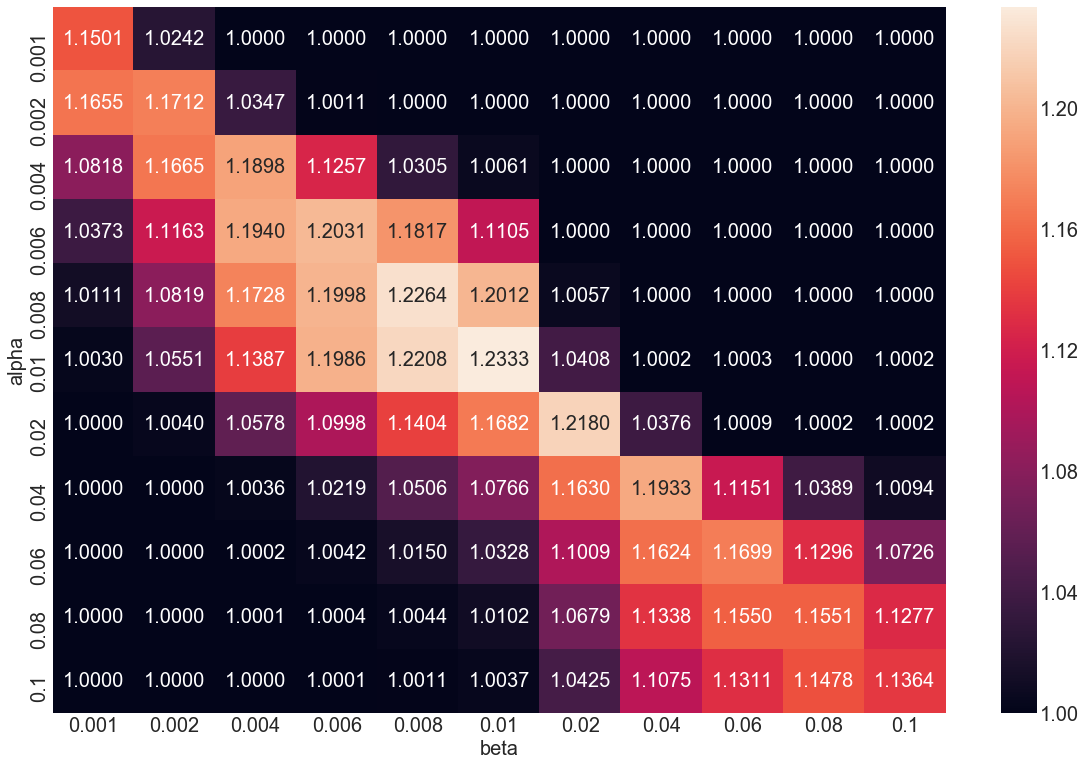

In [5]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

# 20x4 matrices

In [ ]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

In [9]:
matrix_generator = matrix_gen.MatrixGenerator(
    np.random.beta, (0.01, 0.1), N, N_INTVS
)

while True:
    (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
        round_=False
    )


    # Efficient
    eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

    # Leximin
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        sorted_increase_matrix * 1e4, CAPACITIES
    )
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        lex_assignments = lex_assigner.solve()
    if lex_assignments is False:
        continue
    lex_cost = lex_assigner.get_cost(
        lex_assignments, cost_matrix=sorted_matrix
    )

    if lex_cost / eff_cost > N - 1:
        print(lex_cost, eff_cost)
        break

5.442316802415469e-12 1.2179982763402905e-16


In [10]:
sorted_matrix

array([[2.34615475e-141, 3.46193104e-084, 1.11193335e-054,
        1.40189194e-024],
       [9.89300260e-035, 1.23052526e-034, 2.66765073e-017,
        3.33504265e-009],
       [3.30112454e-110, 7.31672030e-069, 1.42855260e-021,
        7.90101081e-021],
       [4.89970786e-045, 1.47137314e-018, 4.19316841e-017,
        2.23810570e-013],
       [2.42159752e-069, 9.33039733e-050, 2.17615493e-048,
        8.38921584e-041],
       [3.78449967e-049, 1.97549232e-029, 7.18394338e-017,
        5.76260492e-003],
       [5.47194284e-067, 8.77382359e-044, 2.75103560e-008,
        2.96319794e-007],
       [4.14125889e-035, 1.92116758e-019, 2.84456303e-008,
        7.47836597e-001],
       [7.02930695e-021, 2.16113447e-005, 3.77614174e-004,
        9.99930701e-001],
       [1.54703096e-259, 1.23158281e-106, 7.00673446e-045,
        1.80210447e-007],
       [1.46286280e-128, 1.62756734e-033, 9.99841096e-001,
        1.00000000e+000],
       [3.76402160e-027, 6.27970878e-021, 5.12437459e-017,
      

In [11]:
lex_assignments

array([2, 1, 3, 3, 3, 0, 1, 1, 0, 2, 1, 2, 3, 2, 3, 0, 2, 0, 0, 1])

In [21]:
lex_assigner.get_cost_increases(
    lex_assignments, increase_matrix=sorted_increase_matrix
)

array([1.11193335e-54, 2.41225004e-35, 7.90101081e-21, 2.23810570e-13,
       8.38921584e-41, 0.00000000e+00, 8.77382359e-44, 1.92116758e-19,
       0.00000000e+00, 7.00673446e-45, 1.62756734e-33, 5.12437459e-17,
       2.75200124e-27, 5.21102123e-12, 1.93069758e-18, 0.00000000e+00,
       7.43162573e-15, 0.00000000e+00, 0.00000000e+00, 1.26169788e-36])

In [23]:
lex_assigner.get_cost_increases(
    lex_assignments, increase_matrix=sorted_increase_matrix
).max()

5.211021225024202e-12

In [25]:
full_cost_matrix = np.repeat(sorted_matrix, CAPACITIES, axis=1)
row_ind, col_ind = linear_sum_assignment(full_cost_matrix)

lex_assigner.get_cost_increases(
    col_ind // 5, increase_matrix=sorted_increase_matrix
)

array([1.40189194e-24, 2.66765073e-17, 7.90101081e-21, 4.19316841e-17,
       8.38921584e-41, 1.97549232e-29, 8.77382359e-44, 0.00000000e+00,
       0.00000000e+00, 7.00673446e-45, 1.62756734e-33, 5.12437459e-17,
       2.75200124e-27, 2.72848379e-88, 1.93069758e-18, 0.00000000e+00,
       0.00000000e+00, 2.26051865e-21, 0.00000000e+00, 4.99172293e-25])

In [31]:
matrix_generator = matrix_gen.MatrixGenerator(
    np.random.beta, (0.01, 0.1), N, N_INTVS
)

count = 0
while True:
    print(count)
    
    (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
        round_=False
    )


    # Efficient
    eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

    # Leximin
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        sorted_increase_matrix * 1e10, CAPACITIES
    )
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        lex_assignments = lex_assigner.solve()
    if lex_assignments is False:
        continue
    lex_cost = lex_assigner.get_cost(
        lex_assignments, cost_matrix=sorted_matrix
    )

    if lex_cost / eff_cost > N - 1:
        print(lex_cost, eff_cost)
        break
    
    count += 1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
2
2
2
3
4
1.8053164883540476e-17 8.95815043780786e-20


In [32]:
sorted_increase_matrix

array([[0.00000000e+000, 6.34865530e-039, 2.98074872e-011,
        9.99703340e-001],
       [0.00000000e+000, 2.14553121e-039, 2.14528587e-028,
        5.47536031e-001],
       [0.00000000e+000, 3.58961337e-106, 9.35418020e-053,
        3.53650045e-051],
       [0.00000000e+000, 2.56258797e-040, 5.45270670e-015,
        1.94197430e-005],
       [0.00000000e+000, 3.55603578e-103, 4.31495629e-033,
        1.94533610e-003],
       [0.00000000e+000, 4.84044443e-046, 1.39135293e-023,
        8.49087138e-006],
       [0.00000000e+000, 1.09168406e-027, 7.49531540e-002,
        6.85960096e-001],
       [0.00000000e+000, 6.24423757e-025, 9.77832490e-018,
        1.04325296e-007],
       [0.00000000e+000, 5.26231239e-056, 1.08064918e-023,
        6.48569920e-001],
       [0.00000000e+000, 2.16810716e-018, 7.28824995e-011,
        9.11622351e-010],
       [0.00000000e+000, 4.41169204e-046, 3.20926482e-041,
        1.27774047e-002],
       [0.00000000e+000, 2.31130744e-048, 3.83437454e-047,
      

In [33]:
lex_assigner.get_cost_increases(
    lex_assignments, increase_matrix=sorted_increase_matrix
).max()

1.5795465406822326e-17

In [34]:
full_cost_matrix = np.repeat(sorted_matrix, CAPACITIES, axis=1)
row_ind, col_ind = linear_sum_assignment(full_cost_matrix)

lex_assigner.get_cost_increases(
    col_ind // 5, increase_matrix=sorted_increase_matrix
)

array([6.34865530e-39, 2.14528587e-28, 3.53650045e-51, 2.56258797e-40,
       4.31495629e-33, 4.84044443e-46, 0.00000000e+00, 0.00000000e+00,
       5.26231239e-56, 0.00000000e+00, 3.20926482e-41, 3.83437454e-47,
       2.32279916e-24, 0.00000000e+00, 7.56004156e-37, 2.89639700e-21,
       0.00000000e+00, 1.79440679e-55, 7.98081613e-51, 1.32119440e-33])

In [8]:
matrix_generator = matrix_gen.MatrixGenerator(
    np.random.beta, (0.01, 0.1), N, N_INTVS
)

count = 0
while True:
    print(count)
    
    (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
        round_=False
    )


    # Efficient
    # eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)
    full_cost_matrix = np.repeat(sorted_matrix, CAPACITIES, axis=1)
    row_ind, col_ind = linear_sum_assignment(full_cost_matrix)
    eff_cost = full_cost_matrix[row_ind, col_ind].sum()

    # Leximin
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        sorted_increase_matrix * 1e10, CAPACITIES
    )
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        lex_assignments = lex_assigner.solve()
    if lex_assignments is False:
        continue
    lex_cost = lex_assigner.get_cost(
        lex_assignments, cost_matrix=sorted_matrix
    )
    lex_cost_increases = lex_assigner.get_cost_increases(
        lex_assignments, increase_matrix=sorted_increase_matrix
    )
    
    eff_cost_increases = lex_assigner.get_cost_increases(
        col_ind // (N // N_INTVS), increase_matrix=sorted_increase_matrix
    )

    if lex_cost_increases.max() > eff_cost_increases.max():
        break
    
    count += 1

0
0
1
1
1
1
1
1
2
3
3
3
3
3
3
3
3
4
4
5


In [9]:
lex_cost_increases.max()

5.8527498763362254e-18

In [10]:
eff_cost_increases

array([1.66413901e-032, 5.13597554e-040, 2.93008537e-037, 8.17208615e-027,
       1.43636132e-033, 6.67325548e-038, 6.36481678e-063, 1.86328824e-046,
       0.00000000e+000, 1.31099911e-040, 0.00000000e+000, 6.71634554e-021,
       0.00000000e+000, 2.71434505e-061, 4.19571926e-022, 3.07176290e-113,
       1.47790747e-031, 8.80981311e-026, 0.00000000e+000, 0.00000000e+000])

In [7]:
matrix_generator = matrix_gen.MatrixGenerator(
    np.random.beta, (0.03, 0.3), N, N_INTVS
)

count = 0
while True:
    print(count)
    
    (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
        round_=False
    )


    # Efficient
    # eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)
    full_cost_matrix = np.repeat(sorted_matrix, CAPACITIES, axis=1)
    row_ind, col_ind = linear_sum_assignment(full_cost_matrix)
    eff_cost = full_cost_matrix[row_ind, col_ind].sum()

    # Leximin
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        sorted_increase_matrix * 1e10, CAPACITIES
    )
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        lex_assignments = lex_assigner.solve()
    if lex_assignments is False:
        continue
    lex_cost = lex_assigner.get_cost(
        lex_assignments, cost_matrix=sorted_matrix
    )
    lex_cost_increases = lex_assigner.get_cost_increases(
        lex_assignments, increase_matrix=sorted_increase_matrix
    )
    
    eff_cost_increases = lex_assigner.get_cost_increases(
        col_ind // (N // N_INTVS), increase_matrix=sorted_increase_matrix
    )

    if lex_cost_increases.max() > eff_cost_increases.max():
        break
    
    count += 1

0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
7
8
8
9
10
11
12
12
13
14
14
14
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
17
18
18
18
18
18
18
18
18
18
19
20
20
20
20
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
24
25
25
25
25
25
26
26
26
27
27
28
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices